## 課題5-02：バックトラック付き勾配法

課題5-01で行った式(1)の勾配法での最適化に，バックトラックサーチを追加したものを以下に作成せよ．
アルミホの条件で減少量の判定を行うこと．

作成の手順を以下に示す．
ただし，最初に`calc_f`と`calc_grad`を作成しておく．これらは課題5-01と同じでよい．
幅$\alpha$の初期値$\alpha_0$や，減衰率$\tau$，アルミホの条件の$\xi$などはすでに定義されている値をそのまま使えばよい．



1. 「バックトラックの繰り返し」とコメントされている部分がバックトラックで$\alpha$を下げながら$f$の値の減少を判定するループに対応している．
for文の前で，$\boldsymbol{x}^{(t)}$を上書きして失わないように`x`を`x_prev`にコピーしている．
`x_prev`から現在の$\alpha$で値を更新した`x`を作成する．

2. アルミホの条件の右辺を計算する

3. 現在の一時的な$\boldsymbol{x}$での$f(\boldsymbol{x})$を計算し，アルミホの不等式が成立するか調べる

4. ステップ幅$\alpha$を倍率$\tau$で減衰させる



$\boldsymbol{x}$の更新軌跡を表示して，振る舞いを確認する．


- レポートに含める内容:
  - 実行例
    - 初期値が$\boldsymbol{x}=(3, 5)$の場合
    - 初期値が上記以外の場合
  - それぞれの実行例について，$\boldsymbol{x}$の更新軌跡，反復ごとの関数値$f(x)$と勾配のノルム$\| \boldsymbol{g}(\boldsymbol{x}) \|$のプロット
    - 関数値と勾配ノルムは，それぞれについて，縦軸が線形軸のものと対数軸のもの


In [13]:
import numpy as np


def calc_f(x):
    """目的関数の計算

    Args:
        x (ndarray): 現在の変数xの値

    Returns:
        fx (float): 関数値f(x)
    """

    #
    # 1. ここにf(x)の計算を作成し返す
    # (テンプレートは暫定的に0を返してるので書き換える)
    #

    x, y = x
    fx = 0.26 * (x**2 + y**2) - 0.48*x*y

    return fx


def calc_grad(x):
    """勾配とそのノルムの計算

    Args:
        x (ndarray): 現在の変数xの値

    Returns:
        norm_grad (float): 勾配ベクトルのノルム
        grad (ndarray): 勾配ベクトル
    """

    #
    # 2. ここで, ２次元ベクトル"grad"に勾配を設定
    #
    x, y = x
    grad =  np.array([
        0.52*x - 0.48*y,
        0.52*y - 0.48*x
    ])

    #
    # 2. 勾配のノルムの値を返り値で返す
    #
    # ヒント: 平方根を求める関数は np.sqrt(x) が利用可能
    # 参考: numpyにはノルムを求める関数も存在するのでわかる人はそちらを使っても良い

    norm_grad = np.linalg.norm(grad)

    return norm_grad, grad


def min_func(x):
    """最小化を行う関数

    Args:
        x (ndarray): xの初期値

    Returns:
        (ndarray): xの最適解
        (bool): 収束したかどうかのフラグ
        (ndarray): xの軌跡
        (ndarray): f(x)の軌跡
        (ndarray): ||g(x)||の軌跡
    """

    maxIter = 500  # 最大繰り返し
    tol = 0.01 # 停止条件
    alpha = 0.1  # 更新幅

    is_converged = False
    trajectory = []  # 最適化の過程を保存する変数
    trajectory_fx = []
    trajectory_norm_g = []

    for iter in range(maxIter):
        
        # 現在の解を保存（プロット用）
        trajectory.append(x)

        #
        # 1. 現在の目的関数の値を計算する
        #

        fx = calc_f(x)
        trajectory_fx.append(fx)

        #
        # 2. 現在の勾配を計算する
        #

        norm_g, g = calc_grad(x)
        trajectory_norm_g.append(norm_g)

        print("Iteration {}: f(x)={}, x={}, g={}, ||g||={}".format(
            iter, fx, x, g, norm_g
        ))

        #
        # 勾配のノルムが十分小さくなれば終了
        # 
        if norm_g < tol:
            is_converged = True
            print("勾配のノルムが十分小さくなる")
            break

        #
        # 3. xを更新する（バックトラック付き）
        #
       

        maxIterBT = 10  # バックトラック最大回数
        xi = 0.1  # アルミホ条件右辺の定数
        tau = 0.9  # バックトラック減衰率
        alpha0 = 1  # バックトラック初期更新幅


        x_prev = x  # 古い解を保存
        alpha = alpha0  # 更新幅初期化
        is_accepted = False  # バックトラック中にアルミホを満たしたか


        #
        # バックトラックの繰り返し
        #
        for btIter in range(maxIterBT):

            # 1. 現在のalphaでx_prevから更新したxを作る
            x = x_prev - alpha * g

            # 2. アルミホの条件の右辺を計算する
            armijoRHS =  calc_f(x_prev) + xi * g.T @  (-g)


            # 3. f_tempに現在の一時的なxでのf(x)をf_tempに計算し，
            #    if文でアルミホ条件を判定 
            #    (以下のif文の条件部を作成し，コメントを外す)

            f_temp = calc_f(x)
            if f_temp <= armijoRHS:
                is_accepted = True  # 不等式が成立したことを記録
                break

            # 4. ステップ幅alphaを減衰させる
            alpha *= tau   


        if not is_accepted:  # 最小更新幅でもアルミホが満たされなかったら古い解に戻して終了
            x = x_prev
            print("アルミホが不成立")
            break


    return x, is_converged, np.array(trajectory), \
        np.array(trajectory_fx), np.array(trajectory_norm_g)            


# 初期解
x = np.array([3.0, 4.0])
print("initial solution:", x)

x, is_converged, trajectory, traj_fx, traj_norm_g = min_func(x)

# 最適解
print("最適解:", x)

initial solution: [3. 4.]
Iteration 0: f(x)=0.7400000000000002, x=[3. 4.], g=[-0.36  0.64], ||g||=0.7343023900274328
Iteration 1: f(x)=0.45158400000000043, x=[3.36 3.36], g=[0.1344 0.1344], ||g||=0.1900703027829444
Iteration 2: f(x)=0.4161798143999995, x=[3.2256 3.2256], g=[0.129024 0.129024], ||g||=0.18246749067162657
Iteration 3: f(x)=0.3835513169510403, x=[3.096576 3.096576], g=[0.12386304 0.12386304], ||g||=0.17516879104476155
Iteration 4: f(x)=0.3534808937020788, x=[2.97271296 2.97271296], g=[0.11890852 0.11890852], ||g||=0.16816203940297078
Iteration 5: f(x)=0.32576799163583603, x=[2.85380444 2.85380444], g=[0.11415218 0.11415218], ||g||=0.16143555782685218
Iteration 6: f(x)=0.30022778109158565, x=[2.73965226 2.73965226], g=[0.10958609 0.10958609], ||g||=0.15497813551377773
Iteration 7: f(x)=0.27668992305400586, x=[2.63006617 2.63006617], g=[0.10520265 0.10520265], ||g||=0.14877901009322697
Iteration 8: f(x)=0.2549974330865714, x=[2.52486353 2.52486353], g=[0.10099454 0.10099454]

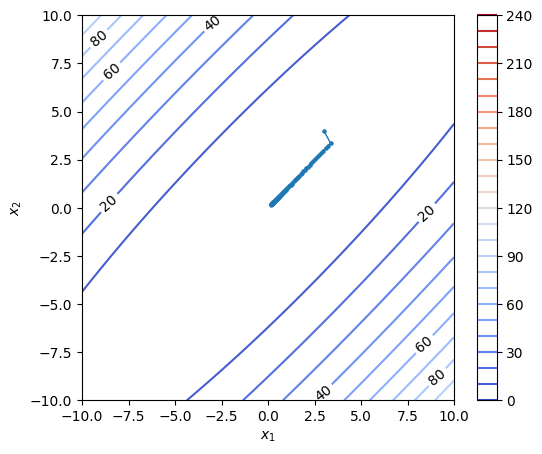

In [7]:
#
# 作図用．編集の必要なし
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

def visualize_f(trajectory):
    
    def f(x):
        return calc_f(x)

    fig, ax = plt.subplots(figsize=(6, 5))
    plt.scatter(trajectory[:, 0], trajectory[:, 1], lw=1, s=5)
    plt.plot(trajectory[:, 0], trajectory[:, 1], lw=1)

    # set plot range
    x_min = -10
    x_max = +10
    y_min = -10
    y_max = +10
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # make a grid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] 
    # evaluate f() at each point in the grid
    Z = np.array([f(x) for x in np.c_[XX.ravel(), YY.ravel()]])
    Z = Z.reshape(XX.shape) # reshape form 1D to 2D
    
    cs = plt.contour(XX, YY, Z, 
                    cmap='coolwarm',
                    levels=list(np.arange(0, 250, 10)),
                    )
    ax.clabel(cs, colors='k', fmt='%d',
              levels=list(np.arange(0, 250, 20)))
    plt.colorbar()

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')




# 作図と保存

visualize_f(trajectory)


Text(0, 0.5, '$f(x)$')

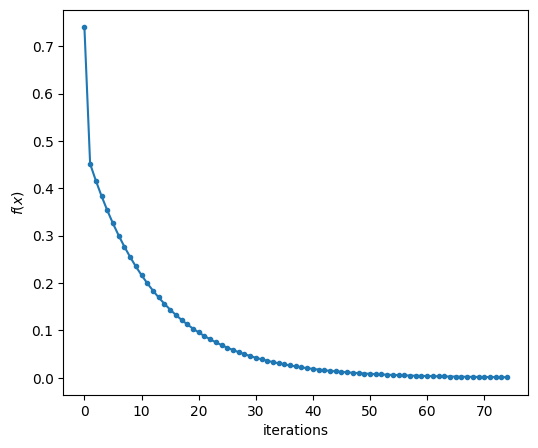

In [8]:
#
# 作図用．編集の必要なし．
#

fig, ax = plt.subplots(figsize=(6, 5))

plt.plot(traj_fx, '.-')
plt.xlabel('iterations')
plt.ylabel('$f(x)$')
# plt.yscale('log')  # 縦軸を対数スケールにする


Text(0, 0.5, '$||g(x)||$')

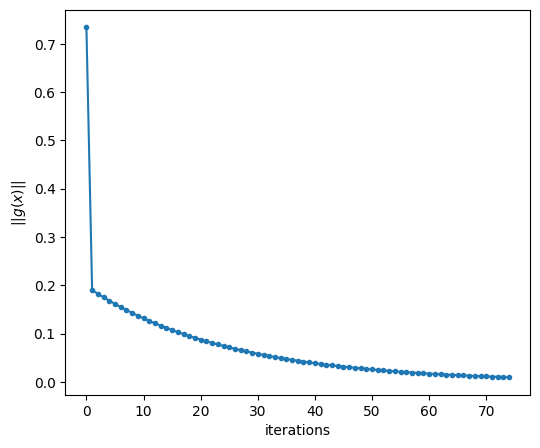

In [9]:
#
# 作図用．編集の必要なし．
#

fig, ax = plt.subplots(figsize=(6, 5))

plt.plot(traj_norm_g, '.-')
plt.xlabel('iterations')
plt.ylabel('$||g(x)||$')
# plt.yscale('log')  # 縦軸を対数スケールにする
